# EDA

## Getting Started

In this notebook, we're going to look at articles about clean technology to see what they talk about and when they were written. We'll use some tools to help us understand the data better:

- `pandas` 
- `matplotlib.pyplot` and `seaborn`
- `CountVectorizer`
- `TextBlob`
- `nltk` 
- `wordcloud` 
- `TfidfVectorizer` 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

With these tools, we're ready to start exploring our articles and see what stories they tell us!

## Loading the Data
Now let's get our data into the notebook. We have a bunch of articles all stored in a file, and we want to read them so we can start asking questions about them.

Once we read the data, we'll peek at the first few lines.

Here's what our data columns mean:

- **title**: The headline of the article.
- **date**: The day the article was published.
- **content**: What the article says.
- **domain**: Where the article came from.
- **url**: The web address where we can find the article.

Let's load up the data and take a quick look at the first few rows:

In [2]:
data = pd.read_csv('data/processed/clean_cleantech.csv')
data.head()

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1               India Launches Its First 700 MW PHWR  2021-01-15   
2              New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                             content       domain  \
0  qatar petroleum  qp is targeting aggressive cu...  energyintel   
1   nuclear power corp. of india ltd.  npcil sync...  energyintel   
2  new us president joe biden took office this we...  energyintel   
3  the slow pace of japanese reactor restarts con...  energyintel   
4  two of new york citys largest pension funds sa...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

When we run this, we'll see the first five rows of our data. This gives us a quick check to make sure everything's loaded as expected and that the data looks like what we think it should look like.

In [3]:
data.describe()

title        date  \
count                               9587        9587   
unique                              9563         967   
top     Cleantech Thought Leaders Series  2023-05-04   
freq                                   5         427   

                                                  content         domain  \
count                                                9587           9587   
unique                                               9582             19   
top     geopolitics as much as price or quality will d...  cleantechnica   
freq                                                    2           1861   

                                                      url  
count                                                9587  
unique                                               9587  
top     https://www.energyintel.com/0000017b-a7dc-de4c...  
freq                                                    1

Let's see what it tells us about each column:

- **title**: Almost every article has a unique title, which is great because it means lots of different stories.
- **date**: There are 967 unique dates, so maybe some dates have more articles than others.
- **content**: Nearly every article has unique content, so there's a whole lot of information to learn from.
- **domain**: There are 19 domains, or places where the articles came from. This will help us see who talks most about cleantech.
- **url**: Every article has its own web address, which means we can find each one online if we want to read more.

One thing that pops out is that some titles show up more than once—like the "Cleantech Thought Leaders Series." Also, there's one date, "2023-05-04," that has way more articles than others. And "cleantechnica" is a domain that shows up a lot!

## Organizing and Understanding Article Dates and Domains

We've got our data loaded, and now we want to make sure the dates are in a format that lets us analyze them over time. We also want to see how many articles come from each place that writes about cleantech.

First, we change the dates to a `date` format.

Next, we count how many articles were published on each date. Sorting these counts helps us see if there were some really busy days with lots of articles, or maybe some quiet times.

We also count how many articles each domain published. This will show us who's talking a lot about cleantech and who's not saying as much.

In [4]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a distribution of the number of articles by date
articles_by_date = data['date'].value_counts().sort_index()

# Create a distribution of the number of articles by domain
articles_by_domain = data['domain'].value_counts()

#show it as a table
articles_by_domain



domain
cleantechnica            1861
azocleantech             1627
pv-magazine              1206
energyvoice              1017
solarindustrymag          673
naturalgasintel           658
thinkgeoenergy            644
rechargenews              559
solarpowerworldonline     505
energyintel               234
pv-tech                   232
businessgreen             158
greenprophet               80
ecofriend                  38
solarpowerportal.co        34
eurosolar                  24
decarbxpo                  18
solarquarter               17
indorenergy                 2
Name: count, dtype: int64

When we look at the table, we can see the numbers. For example, "cleantechnica" has the most articles—1,861! That's a lot of talking about clean energy and technology. It seems like they're really into this topic. Other places, like "indorenergy," only have a couple of articles, so they might be newer or just not as focused on this subject.

## Exploring the Most Common Words

C:\Users\olive\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


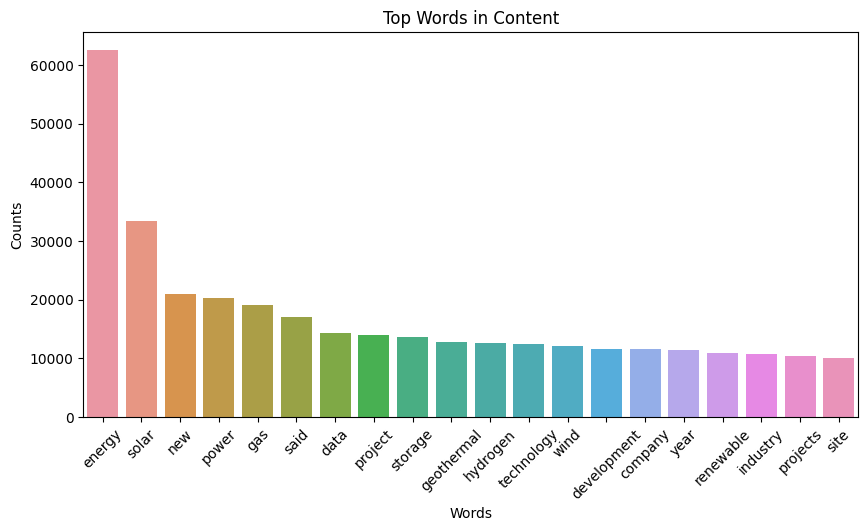

In [5]:
def plot_top_words(data, n_top_words=20):
    # Vectorizer to count word frequencies, ignoring common English stopwords
    vectorizer = CountVectorizer(stop_words='english')
    word_count_matrix = vectorizer.fit_transform(data)
    
    # Summing word counts and sorting
    sum_words = word_count_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Extract top N words
    top_words = words_freq[:n_top_words]
    words, counts = zip(*top_words)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(words), y=list(counts))
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title('Top Words in Content')
    plt.show()

# Plot top words in content
plot_top_words(data['content'], n_top_words=20)


To get a feel for what's being talked about in all these cleantech articles, we counted up all the words and made a list of the ones that show up the most. We skipped over small words like "the" and "is" that don't tell us much about the topic.

Here's how we did it:

1. We used a tool that counts words to go through all the articles.
2. Then we added up all the times each word appears.
3. We sorted them so the most common words are at the top of the list.
4. We picked the top 20 words to look at.

## Highlighting Key Terms with TF-IDF

We have another neat way to find out which words might be really important in our articles. It's called TF-IDF, which stands for "Term Frequency-Inverse Document Frequency". It finds words that are common in a few articles but not in all of them. This usually means these words are key ideas in those articles.

Here's how we go about it:

1. We use the TF-IDF Vectorizer to turn our articles into a math problem that the computer can understand.
2. We then add up the scores for each word across all articles.
3. After that, we make a list of the top words based on their scores.
4. We draw a bar chart to show these words, with the highest scoring words at the top.

These top-scoring words are often the ones that tell us the most about what's unique in our articles. We expect to see some words that are very much about clean technology topics.

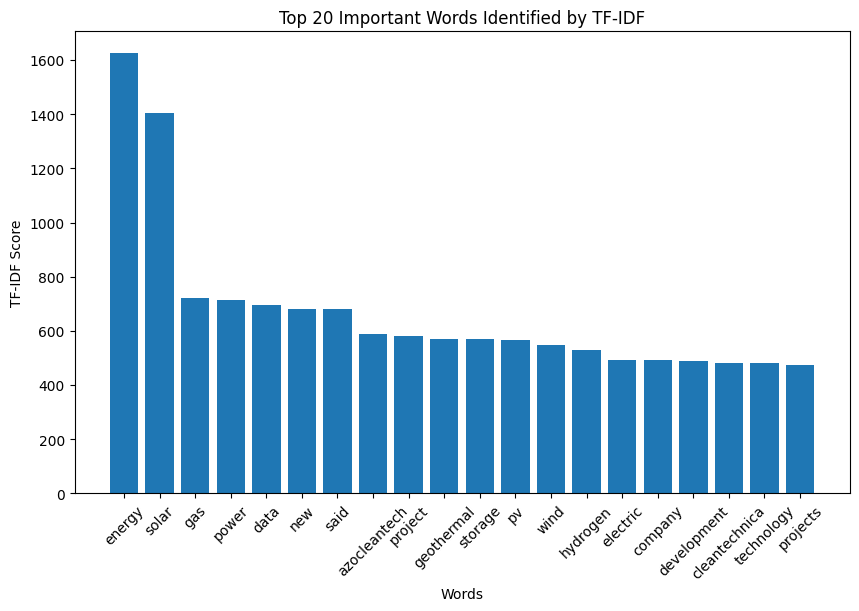

In [6]:
# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  # Considering top 100 features for simplicity

# Fit and transform the content to a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data['content'])

# Sum the TF-IDF scores for each word across all documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Create a DataFrame for word scores
words = vectorizer.get_feature_names_out()
scores = sum_tfidf.A1  # Convert to a numpy array
tfidf_scores = pd.DataFrame(list(zip(words, scores)), columns=['word', 'score']).sort_values(by='score', ascending=False)

# Plot the top 20 words
plt.figure(figsize=(10, 6))
plt.bar(tfidf_scores['word'][:20], tfidf_scores['score'][:20])
plt.xticks(rotation=45)
plt.title('Top 20 Important Words Identified by TF-IDF')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.show()

### Important Words by TF-IDF
This chart still has "energy" and "solar" at the top, but we also see important terms like "azocleantech," "geothermal," and "hydrogen" that might point to specialized topics within the field.

### Key Observations
- **Overlap**: Both charts have "energy" and "solar" as significant words, reinforcing their centrality to cleantech.
- **Unique TF-IDF Terms**: Words like "azocleantech" and "geothermal" might not be the most common, but they're significant within certain articles. This could mean there's substantial discussion about these topics in some domains.
- **Frequency vs. Relevance**: The common word chart reflects frequency and might include more general terms. The TF-IDF chart emphasizes relevance, bringing domain-specific language and specialized topics to light.

When comparing the two charts, it becomes clear that while the frequency gives a sense of overall enthusiasm, the TF-IDF provides insight into the individual conversations within that enthusiasm. This is valuable in determining not only what is being talked about the most, but also what is unique in the discourse.

## Analyzing Article Trends Over Time

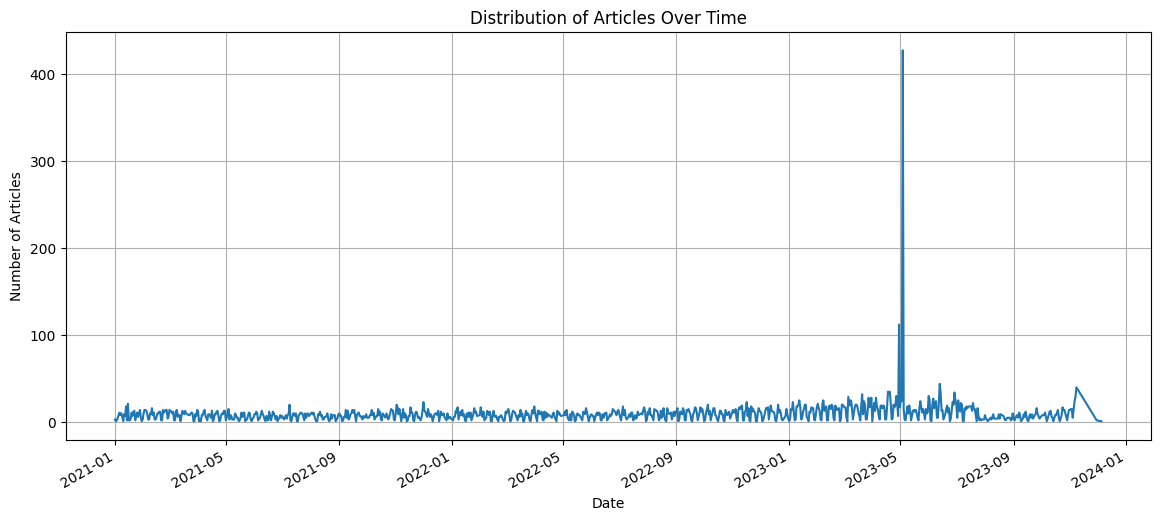

In [7]:
# Plot the number of articles by date
plt.figure(figsize=(14, 6))
articles_by_date.plot()
plt.title('Distribution of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


The line graph we've created gives us a visual story of how many articles were published on each date across our dataset. It looks like there's a pretty steady stream of articles with some spikes here and there. These spikes might tell us about special events or hot topics that got a lot of attention on those days.

For example, you can see a particularly tall spike at one point; something big must have happened then!

## Checking Out Who Publishes What

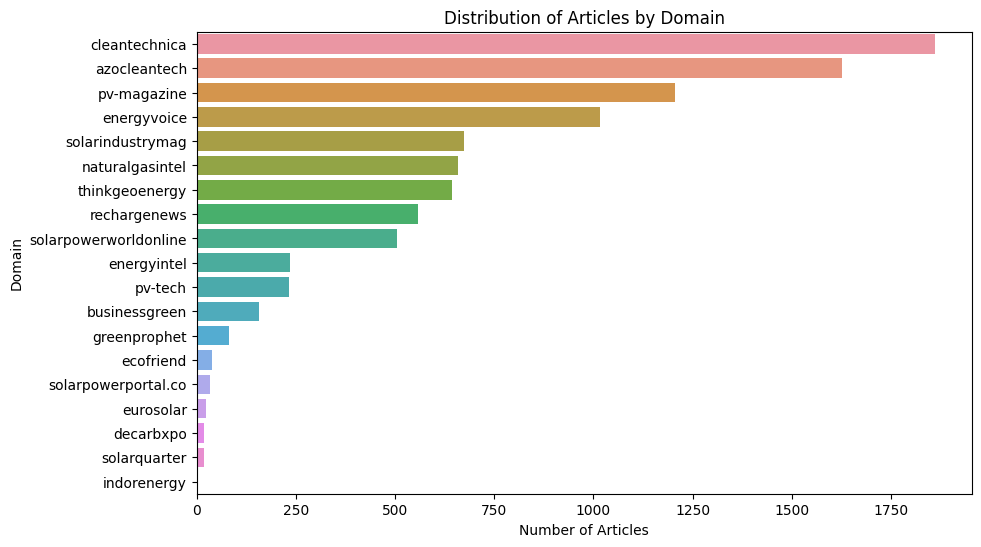

In [8]:
# Plot the number of articles by domain
plt.figure(figsize=(10, 6))
sns.barplot(x=articles_by_domain.values, y=articles_by_domain.index)
plt.title('Distribution of Articles by Domain')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.show()

This colorful bar chart is like a leaderboard showing which websites talk the most about clean technology. It's clear that some places have a lot to say! For instance, 'cleantechnica' is way ahead of everyone else, which makes it seem like they're really into sharing news and stories about clean tech.

## Feeling the Pulse of Sentiment

C:\Users\olive\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


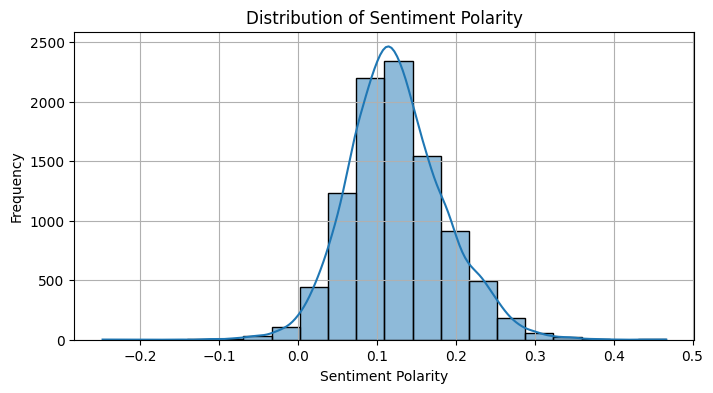

In [9]:
# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis on the content column
data['sentiment_polarity'] = data['content'].apply(calculate_sentiment)

# Overview of sentiment distribution
sentiment_summary = data['sentiment_polarity'].describe()

# Plotting sentiment distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['sentiment_polarity'], bins=20, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This histogram provides information about the sentiment of all our articles. Using the sentiment analysis, we can find out whether the words in the individual articles are more positive, negative or neutral. The diagram is like a sentiment ring: it shows us the general sentiment.

The peaks and troughs tell us the following:

- **peaks in the middle**: Many articles have a score in the middle, meaning they are fairly neutral. This is common with news articles - they just give us the facts.
- **Sloping to the right**: The chart leans a little to the right. This means that more articles have a positive sentiment than a negative one. Maybe that's because there's a lot of good news in the clean tech world!

## Monthly Publication Trends

C:\Users\olive\AppData\Local\Temp\ipykernel_27832\1103526487.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_articles = data.set_index('date').resample('M').size()


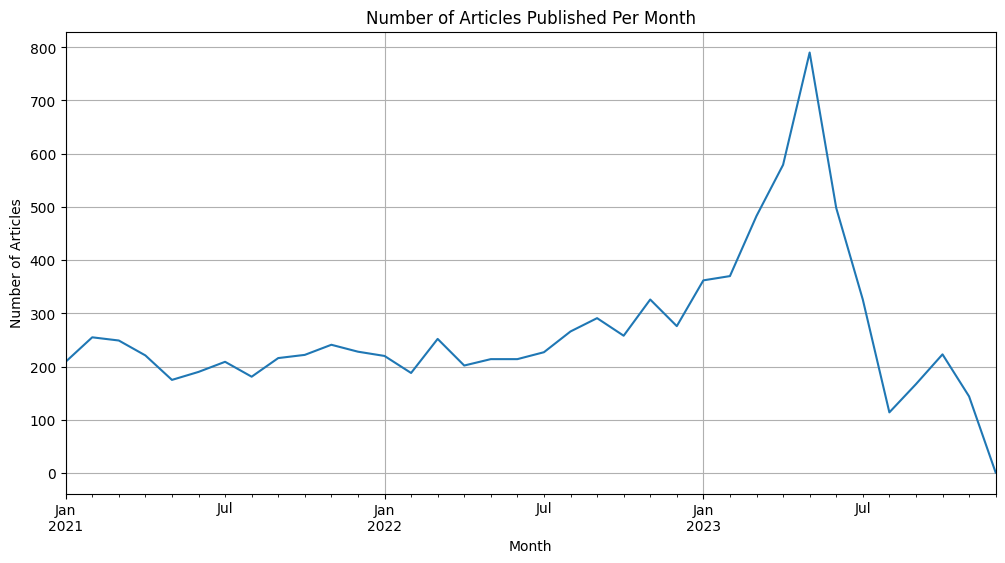

In [10]:
# Resampling the data monthly and counting articles
monthly_articles = data.set_index('date').resample('M').size()

# Plotting the number of articles per month
plt.figure(figsize=(12, 6))
monthly_articles.plot()
plt.title('Number of Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


Our line chart takes us on a journey through time and shows how many articles were published each month. We're looking at how much has been written about clean technology.

Here's what stands out:

- **Steady as She Goes**: By and large, the number of articles each month is pretty consistent.
- **High Speed in Summer**: It could have been a big conference or a major breakthrough in clean technology.

## Wordiness Across Domains

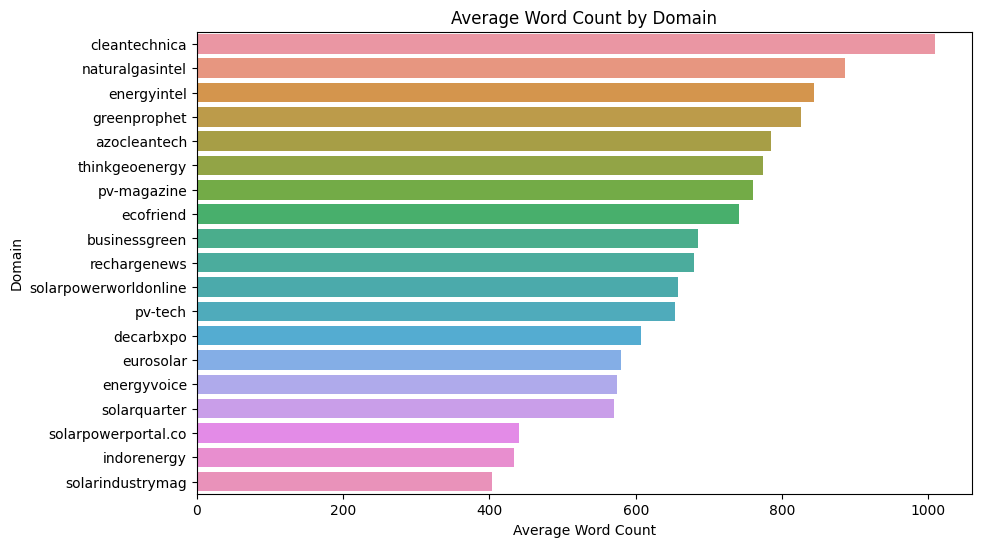

In [11]:
# Calculating the word count for each article
data['word_count'] = data['content'].apply(lambda x: len(x.split()))

# Average word count by domain
avg_word_count_by_domain = data.groupby('domain')['word_count'].mean().sort_values(ascending=False)

# Plotting average word count by domain
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_word_count_by_domain.values, y=avg_word_count_by_domain.index)
plt.title('Average Word Count by Domain')
plt.xlabel('Average Word Count')
plt.ylabel('Domain')
plt.show()


This bar chart not only shows who is talking about cleantech, but also how much they are saying. It shows the average length of articles for each area.

Here's what we can take away from it:

- **Long Reads**: Some domains, such as ‘cleantechnica’, offer some pretty lengthy articles.
- **Short and sweet**: At the other end of the scale, there are sites like ‘solarindustry’ where the articles are shorter.

## Word Cloud: A Picture of Cleantech Conversation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


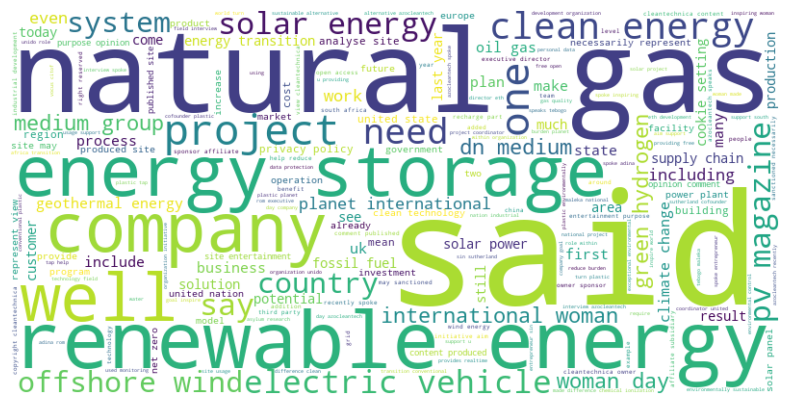

In [12]:
# Ensure that necessary nltk resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text: remove stopwords and apply lemmatization
def preprocess(text):
    # Tokenize by words
    words = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Preprocess all content
processed_text = ' '.join([preprocess(article) for article in data['content']])

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', max_words=200).generate(processed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The visualization above represents a word cloud generated from the text content of cleantech articles. This graphical tool visually quantifies the frequency of word occurrences within the dataset. Larger font sizes correlate with higher frequency, thereby indicating words that are most prevalent in discussions related to clean technology.

**Observations:**
The word cloud prominently features terms such as "renewable," "energy," "solar," and "gas," suggesting these are focal topics within the cleantech dialogue. The presence of words like "company," "project," and "storage" indicates a significant discourse surrounding cleantech initiatives and developments.
